# Clasificación por Redes Neuronales Multicapa

In [1]:
import os
import gzip
import numpy as np

train_labels_path = "datasets/mnist/train-labels-idx1-ubyte.gz"

with gzip.open(train_labels_path, "rb") as data:
    train_labels = np.frombuffer(data.read(), dtype=np.uint8, offset=8)

train_images_path = "datasets/mnist/train-images-idx3-ubyte.gz"

with gzip.open(train_images_path, "rb") as data:
    train_images = np.frombuffer(data.read(), dtype=np.uint8, offset=16).reshape(len(train_labels), 784) # 28x28 = 784

test_labels_path = "datasets/mnist/t10k-labels-idx1-ubyte.gz"

with gzip.open(test_labels_path, "rb") as data:
    test_labels = np.frombuffer(data.read(), dtype=np.uint8, offset=8)

test_images_path = "datasets/mnist/t10k-images-idx3-ubyte.gz"

with gzip.open(test_images_path, "rb") as data:
    test_images = np.frombuffer(data.read(), dtype=np.uint8, offset=16).reshape(len(test_labels), 784)

print("Train Labels", train_labels.shape)
print("Train Images", train_images.shape)
print("Test Labels", test_labels.shape)
print("Test Images", test_images.shape)

Train Labels (60000,)
Train Images (60000, 784)
Test Labels (10000,)
Test Images (10000, 784)


In [15]:
train_labels[0], train_images[0]

(5,
 array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
        126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  30,

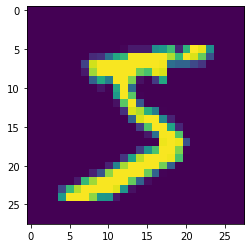

In [6]:
import matplotlib.pyplot as plt

plt.imshow(train_images[0].reshape((28, 28)))

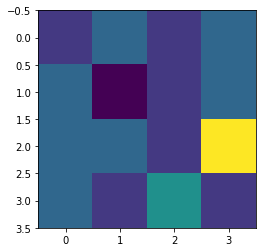

In [9]:
plt.imshow([
    [1, 2, 1, 2],
    [2, 0, 1, 2],
    [2, 2, 1, 6],
    [2, 1, 3, 1],
])

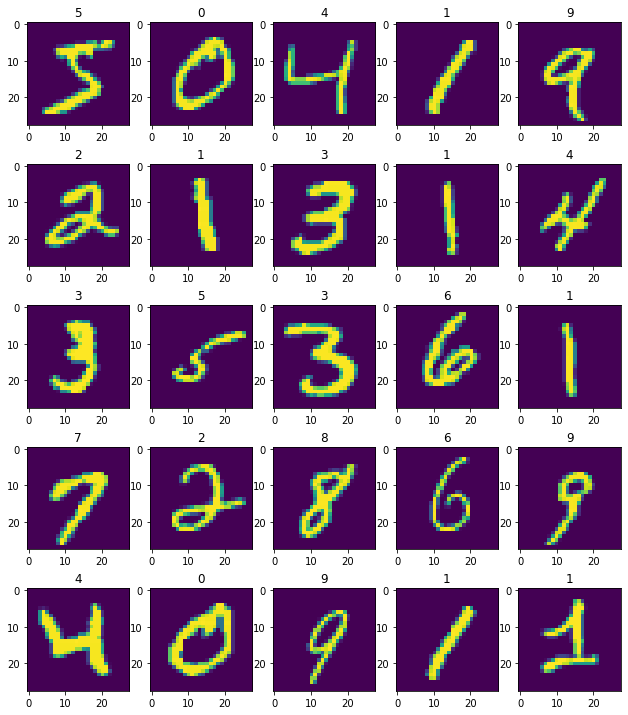

In [14]:
fig = plt.figure()
ax = fig.subplots(5, 5)

for i in range(5):
    for j in range(5):
        k = i * 5 + j
        ax[i][j].set_title(train_labels[k])
        ax[i][j].imshow(train_images[k].reshape((28, 28)))

plt.subplots_adjust(top=2.5, right=1.5)

plt.show()

In [16]:
# y: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9

# ENCODER
# y=0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
# y=1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
# y=2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
# ...
# y=9 -> [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [18]:
def enconder(digit):
    if digit == 0:
        return [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    elif digit == 1:
        return [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
    elif digit == 2:
        return [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
    elif digit == 3:
        return [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
    elif digit == 4:
        return [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
    elif digit == 5:
        return [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
    elif digit == 6:
        return [0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
    elif digit == 7:
        return [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
    elif digit == 8:
        return [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
    elif digit == 9:
        return [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
    else:
        return [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

train_labels_enc = np.array(list(map(enconder, train_labels)))
test_labels_enc = np.array(list(map(enconder, test_labels)))

train_labels_enc

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [21]:
from sklearn.neural_network import MLPClassifier

# Tres capas ocultas de 20-150-20 neuronas respectivamente
clf = MLPClassifier(hidden_layer_sizes=(20,))

clf.fit(train_images, train_labels_enc)



C:\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:619: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLPClassifier(hidden_layer_sizes=(20, 20))

In [ ]:
clf.score(test_images, test_labels_enc)

In [ ]:
fig = plt.figure()
ax = fig.subplots(5, 5)

for i in range(5):
    for j in range(5):
        k = i * 5 + j
        test_image = test_images[k].reshape((28, 28))
        correct_label = test_labels[k]
        predict_label = clf.predict([test_image])[0]
        ax[i][j].set_title("CORR {} / PRED {}".format(correct_label, predict_label))
        ax[i][j].imshow(test_image)

plt.subplots_adjust(top=2.5, right=1.5)

plt.show()